In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# cd sample_data

/content/sample_data


In [5]:
# from google.colab import files
# upload = files.upload()

In [15]:
data_set = pd.read_csv('glen.csv')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_encod = data_set
data_encod.DWD = le.fit_transform(data_encod.DWD)
data_encod.name = le.fit_transform(data_encod.name)
data_encod.wd_description = le.fit_transform(data_encod.wd_description)
data_encod.overlay_parents = le.fit_transform(data_encod.overlay_parents)
# data_encod

X = data_encod[['DWD','wd_description', 'overlay_parents']].values
y = data_encod.name.values

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# ct = ColumnTransformer([(OneHotEncoder(), [0,1,2])], remainder = 'passthrough')
# ct = ColumnTransformer()
ct = ColumnTransformer(
                       [("imputer", SimpleImputer(missing_values=np.nan, strategy='median'), [2]),
                        ("one_hot", OneHotEncoder(categories='auto', sparse=False), slice(0, 1, 2))])

X = ct.fit_transform(X)

X = X[:,0:4]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [19]:
X_train = pd.DataFrame(X_train)
X_train.corr(method='pearson')

,0,1,2,3
0,1.000000,NaN,-0.014850,-0.002657
1,NaN,NaN,NaN,NaN
2,-0.014850,NaN,1.000000,-0.000266
3,-0.002657,NaN,-0.000266,1.000000


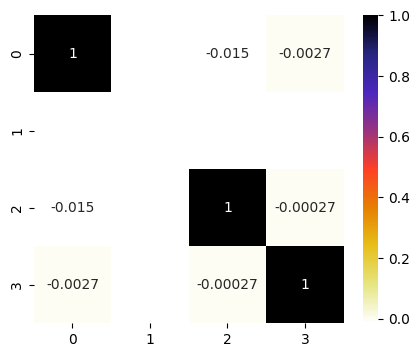

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Using Pearson Correlation
plt.figure(figsize=(5,4))
cor = X_train.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()